In [0]:
from pulp import *
import pandas as pd
import sys
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [0]:
#!{sys.executable} -m pip install xlrd

# Importing the dataset

In [292]:
df = pd.read_excel("openfoodfacts_simplified_database.xlsx")
df = df[~df['nutrition_grade_fr'].isna()]
df['nutrition_grade_fr'].describe()

count     5925
unique       5
top          d
freq      1599
Name: nutrition_grade_fr, dtype: object

In [293]:
cols = ['energy_100g', 'saturated-fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'sodium_100g', 'nutrition_grade_fr']
df = df[cols]
df.columns = ['energy', 'saturated_fat', 'sugars', 'fiber', 'proteins', 'salt', 'nutriscore']
df.head()

,energy,saturated_fat,sugars,fiber,proteins,salt,nutriscore
0,590.0,0.5,5.5,1.8,6.2,0.236,b
3,1477.0,1.5,10.0,9.9,5.4,2.200,b
4,176.0,0.0,9.7,0.0,0.5,0.000,c
8,1022.0,1.9,0.5,1.4,12.0,0.332,b
9,196.0,0.0,11.0,0.5,0.7,0.040,c


In [0]:
max_energy = df['energy'].max()
min_energy = df['energy'].min()

In [0]:
df = df[~df['energy'].isna()]
df = df[~df['saturated_fat'].isna()]
df = df[~df['sugars'].isna()]
df = df[~df['fiber'].isna()]
df = df[~df['proteins'].isna()]
df = df[~df['salt'].isna()]

In [0]:
# Normalize the energy column
df['energy'] = (df['energy']-df['energy'].min()) / (df['energy'].max()-df['energy'].min())*100

In [0]:
#df_original = df
#orginal_indices = set(df.index)

In [0]:
# Sample
#df = df.sample(frac=0.05)
#sample_indices = set(df.index)

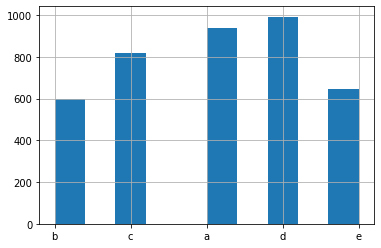

In [297]:
df['nutriscore'].hist()

In [0]:
df['nutriscore'] = np.where(df['nutriscore']=='a', 5, df['nutriscore'])
df['nutriscore'] = np.where(df['nutriscore']=='b', 4, df['nutriscore'])
df['nutriscore'] = np.where(df['nutriscore']=='c', 3, df['nutriscore'])
df['nutriscore'] = np.where(df['nutriscore']=='d', 2, df['nutriscore'])
df['nutriscore'] = np.where(df['nutriscore']=='e', 1, df['nutriscore'])

# Split the dataset

In [0]:
features = ['energy', 'proteins', 'salt', 'fiber', 'saturated_fat', 'sugars']
X = df[features]
y = df[['nutriscore']]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [301]:
df = X_train
df['nutriscore'] = y_train['nutriscore']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


energy           3196
proteins         3196
salt             3196
fiber            3196
saturated_fat    3196
sugars           3196
nutriscore       3196
dtype: int64

# Formalize the problem

In [304]:
prob = LpProblem("The Nutriscore", LpMinimize)

/usr/local/lib/python3.6/dist-packages/pulp/pulp.py:1137: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [0]:
pi = []
pi.append([
           LpVariable('pi_1_energy', 0, 100),
           LpVariable('pi_1_saturated_fat', 0, 100),
           LpVariable('pi_1_sugars', 0, 100),
           LpVariable('pi_1_fiber', 0, 100),
           LpVariable('pi_1_proteins', 0, 100),
           LpVariable('pi_1_salt', 0, 100),
           ])
pi.append([
           LpVariable('pi_2_energy', 0, 100),
           LpVariable('pi_2_saturated_fat', 0, 100),
           LpVariable('pi_2_sugars', 0, 100),
           LpVariable('pi_2_fiber', 0, 100),
           LpVariable('pi_2_proteins', 0, 100),
           LpVariable('pi_2_salt', 0, 100),
           ])
pi.append([
           LpVariable('pi_3_energy', 0, 100),
           LpVariable('pi_3_saturated_fat', 0, 100),
           LpVariable('pi_3_sugars', 0, 100),
           LpVariable('pi_3_fiber', 0, 100),
           LpVariable('pi_3_proteins', 0, 100),
           LpVariable('pi_3_salt', 0, 100),
           ])
pi.append([
           LpVariable('pi_4_energy', 0, 100),
           LpVariable('pi_4_saturated_fat', 0, 100),
           LpVariable('pi_4_sugars', 0, 100),
           LpVariable('pi_4_fiber', 0, 100),
           LpVariable('pi_4_proteins', 0, 100),
           LpVariable('pi_4_salt', 0, 100),
           ])
pi.append([
           LpVariable('pi_5_energy', 0, 100),
           LpVariable('pi_5_saturated_fat', 0, 100),
           LpVariable('pi_5_sugars', 0, 100),
           LpVariable('pi_5_fiber', 0, 100),
           LpVariable('pi_5_proteins', 0, 100),
           LpVariable('pi_5_salt', 0, 100),
           ])
pi.append([
           LpVariable('pi_6_energy', 0, 100),
           LpVariable('pi_6_saturated_fat', 0, 100),
           LpVariable('pi_6_sugars', 0, 100),
           LpVariable('pi_6_fiber', 0, 100),
           LpVariable('pi_6_proteins', 0, 100),
           LpVariable('pi_6_salt', 0, 100),
           ])

In [0]:
# Error to minimize
eps = []
eps.append([
           LpVariable('eps_1_energy', 0, 100),
           LpVariable('eps_1_saturated_fat', 0, 100),
           LpVariable('eps_1_sugars', 0, 100),
           LpVariable('eps_1_fiber', 0, 100),
           LpVariable('eps_1_proteins', 0, 100),
           LpVariable('eps_1_salt', 0, 100),
           ])
eps.append([
           LpVariable('eps_2_energy', 0, 100),
           LpVariable('eps_2_saturated_fat', 0, 100),
           LpVariable('eps_2_sugars', 0, 100),
           LpVariable('eps_2_fiber', 0, 100),
           LpVariable('eps_2_proteins', 0, 100),
           LpVariable('eps_2_salt', 0, 100),
           ])
eps.append([
           LpVariable('eps_3_energy', 0, 100),
           LpVariable('eps_3_saturated_fat', 0, 100),
           LpVariable('eps_3_sugars', 0, 100),
           LpVariable('eps_3_fiber', 0, 100),
           LpVariable('eps_3_proteins', 0, 100),
           LpVariable('eps_3_salt', 0, 100),
           ])
eps.append([
           LpVariable('eps_4_energy', 0, 100),
           LpVariable('eps_4_saturated_fat', 0, 100),
           LpVariable('eps_4_sugars', 0, 100),
           LpVariable('eps_4_fiber', 0, 100),
           LpVariable('eps_4_proteins', 0, 100),
           LpVariable('eps_4_salt', 0, 100),
           ])
eps.append([
           LpVariable('eps_5_energy', 0, 100),
           LpVariable('eps_5_saturated_fat', 0, 100),
           LpVariable('eps_5_sugars', 0, 100),
           LpVariable('eps_5_fiber', 0, 100),
           LpVariable('eps_5_proteins', 0, 100),
           LpVariable('eps_5_salt', 0, 100),
           ])
eps.append([
           LpVariable('eps_6_energy', 0, 100),
           LpVariable('eps_6_saturated_fat', 0, 100),
           LpVariable('eps_6_sugars', 0, 100),
           LpVariable('eps_6_fiber', 0, 100),
           LpVariable('eps_6_proteins', 0, 100),
           LpVariable('eps_6_salt', 0, 100),
           ])

In [0]:
prob += (lpSum([e for e in eps[0]]) + 
         lpSum([e for e in eps[1]]) + 
         lpSum([e for e in eps[2]]) +
         lpSum([e for e in eps[3]]) +
         lpSum([e for e in eps[4]]) +
         lpSum([e for e in eps[5]])), "Minimize the error in the thresholds"

In [0]:
for index, food in df.iterrows():
  score = food['nutriscore']
  pi_lower = score-1
  pi_upper = score
  prob += (food['energy'] <= pi[pi_lower][0] + eps[pi_lower][0])
  prob += (food['energy'] >= pi[pi_upper][0] - eps[pi_upper][0])
  prob += (food['saturated_fat'] <= pi[pi_lower][1] + eps[pi_lower][1])
  prob += (food['saturated_fat'] >= pi[pi_upper][1] - eps[pi_upper][1])
  prob += (food['sugars'] <= pi[pi_lower][2] + eps[pi_lower][2])
  prob += (food['sugars'] >= pi[pi_upper][2] - eps[pi_upper][2])
  prob += (food['fiber'] >= pi[pi_lower][3] - eps[pi_lower][3])
  prob += (food['fiber'] <= pi[pi_upper][3] + eps[pi_upper][3])
  prob += (food['proteins'] >= pi[pi_lower][4] - eps[pi_lower][4])
  prob += (food['proteins'] <= pi[pi_upper][4] + eps[pi_upper][4])
  prob += (food['salt'] <= pi[pi_lower][5] + eps[pi_lower][5])
  prob += (food['salt'] >= pi[pi_upper][5] - eps[pi_upper][5])

In [0]:
prob += (pi[0][0] == 100)
prob += (pi[0][1] == 100)
prob += (pi[0][2] == 100)
prob += (pi[0][3] == 0)
prob += (pi[0][4] == 0)
prob += (pi[0][5] == 100)

prob += (pi[5][0] == 0)
prob += (pi[5][1] == 0)
prob += (pi[5][2] == 0)
prob += (pi[5][3] == 100)
prob += (pi[5][4] == 100)
prob += (pi[5][5] == 0)

In [0]:
prob += (pi[0][0] >= pi[1][0]+1)
prob += (pi[1][0] >= pi[2][0]+1)
prob += (pi[2][0] >= pi[3][0]+1)
prob += (pi[3][0] >= pi[4][0]+1)
prob += (pi[4][0] >= pi[5][0]+1)

prob += (pi[0][1] >= pi[1][1]+1)
prob += (pi[1][1] >= pi[2][1]+1)
prob += (pi[2][1] >= pi[3][1]+1)
prob += (pi[3][1] >= pi[4][1]+1)
prob += (pi[4][1] >= pi[5][1]+1)

prob += (pi[0][2] >= pi[1][2]+1)
prob += (pi[1][2] >= pi[2][2]+1)
prob += (pi[2][2] >= pi[3][2]+1)
prob += (pi[3][2] >= pi[4][2]+1)
prob += (pi[4][2] >= pi[5][2]+1)

prob += (pi[0][3] <= pi[1][3]-1)
prob += (pi[1][3] <= pi[2][3]-1)
prob += (pi[2][3] <= pi[3][3]-1)
prob += (pi[3][3] <= pi[4][3]-1)
prob += (pi[4][3] <= pi[5][3]-1)

prob += (pi[0][4] <= pi[1][4]-1)
prob += (pi[1][4] <= pi[2][4]-1)
prob += (pi[2][4] <= pi[3][4]-1)
prob += (pi[3][4] <= pi[4][4]-1)
prob += (pi[4][4] <= pi[5][4]-1)

prob += (pi[0][5] >= pi[1][5]+1)
prob += (pi[1][5] >= pi[2][5]+1)
prob += (pi[2][5] >= pi[3][5]+1)
prob += (pi[3][5] >= pi[4][5]+1)
prob += (pi[4][5] >= pi[5][5]+1)

In [311]:
prob.solve()
print("Status:", LpStatus[prob.status])

Status: Optimal


In [0]:
# Each of the variables is printed with it's resolved optimum value
for v in prob.variables():
    print(v.name, "=", v.varValue)

In [0]:
pi_lp = pi
pi = [[var.value() for var in p] for p in pi_lp]

In [0]:
pi = np.array(pi)

In [0]:
# rescaling the energy
pi[:,0] = pi[:,0]/100 * (max_energy-min_energy)

In [315]:
pi

array([[7.51000000e+03, 1.00000000e+02, 1.00000000e+02, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+02],
       [1.90749997e+03, 2.10000000e+01, 5.00000000e+01, 1.10000000e+01,
        1.25000000e+01, 4.00000000e+00],
       [1.73199998e+03, 2.00000000e+01, 3.55000000e+01, 1.25000000e+01,
        1.35000000e+01, 3.00000000e+00],
       [1.46000002e+03, 4.45000000e+00, 3.35000000e+01, 1.35000000e+01,
        1.45000000e+01, 2.00000000e+00],
       [1.28749998e+03, 3.10000000e+00, 1.85000000e+01, 1.45000000e+01,
        1.55000000e+01, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+02,
        1.00000000e+02, 0.00000000e+00]])

# Testing

In [0]:
thresh = 0.5
w = 1/6

In [0]:
# Method could be 'optimistic' or 'pessimistic'
def predict(food, pi, method='optimistic'):
  if method == 'optimistic': 
    starting_index = -(len(pi)-1)
    ending_index = 0
  else:
    starting_index = 0
    ending_index = len(pi)-1
  
  max_score = 0
  max_index = starting_index
  i = starting_index
  while (i < ending_index):
    index = -i if method == 'optimistic' else i
    adj_index = index-1 if method == 'optimistic' else index+1

    score = 0
    if (method=='optimistic' and food['energy'] <= pi[adj_index][0] and food['energy'] >= pi[index][0]) or \
        (method!='optimistic' and food['energy'] >= pi[adj_index][0] and food['energy'] <= pi[index][0]):
        score += w
    if (method=='optimistic' and food['saturated_fat'] <= pi[adj_index][1] and food['saturated_fat'] >= pi[index][1]) or \
        (method!='optimistic' and food['saturated_fat'] >= pi[adj_index][1] and food['saturated_fat'] <= pi[index][1]):
        score += w
    if (method=='optimistic' and food['sugars'] <= pi[adj_index][2] and food['sugars'] >= pi[index][2]) or \
        (method!='optimistic' and food['sugars'] >= pi[adj_index][2] and food['sugars'] <= pi[index][2]):
        score += w
    if (method=='optimistic' and food['fiber'] >= pi[adj_index][3] and food['fiber'] <= pi[index][3]) or \
        (method!='optimistic' and food['fiber'] <= pi[adj_index][3] and food['fiber'] >= pi[index][3]):
        score += w
    if (method=='optimistic' and food['proteins'] >= pi[adj_index][4] and food['proteins'] <= pi[index][4]) or \
        (method!='optimistic' and food['proteins'] <= pi[adj_index][4] and food['proteins'] >= pi[index][4]):
        score += w
    if (method=='optimistic' and food['salt'] <= pi[adj_index][5] and food['salt'] >= pi[index][5]) or \
        (method!='optimistic' and food['salt'] >= pi[adj_index][5] and food['salt'] <= pi[index][5]):
        score += w
      
    if score > max_score:
      max_score = score
      max_index = index
    i += 1
  
  return max_index if method =='optimistic' else max_index+1
  

In [318]:
x = 3
y = 1 if x == 3 else 2
print(y)

1


In [355]:
test_df = X_test
test_df['nutriscore'] = y_test['nutriscore']

y_pred = []

for index, food in test_df.iterrows():
  pred = predict(food, pi, 'pessimistic')
  y_pred.append(pred)

  #if pred is None:
  #  print(food)
  #  print()



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [356]:
confusion_matrix(list(test_df['nutriscore']), y_pred, labels=[1,2,3,4,5])

array([[ 12,   0,   0,   0, 126],
       [  3,   0,   0,   0, 198],
       [  0,   0,   0,   0, 157],
       [  0,   0,   0,   0, 130],
       [  0,   0,   0,   0, 173]])

In [0]:
(test_df['nutriscore'] == y_pred).mean()

In [341]:
test_df = X_test
test_df['nutriscore'] = y_test['nutriscore']

y_pred = []

for index, food in test_df.iterrows():
  pred = predict(food)
  y_pred.append(pred)

  #if pred is None:
  #  print(food)
  #  print()



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [343]:
(test_df['nutriscore'] == y_pred).mean()

0.2553191489361702

# Set the thesholds of the model manually

In [0]:
pi_2 = np.array([
                 [7510, 100, 100, 0, 0, 100],
                 [6000, 80, 80, 20, 20, 80],
                 [4500, 60, 60, 40, 40, 60],
                 [3000, 40, 40, 60, 60, 40],
                 [1500, 20, 20, 80, 80, 20],
                 [0, 0, 0, 100, 100, 0]
])

In [349]:
test_df = X_test
test_df['nutriscore'] = y_test['nutriscore']

y_pred = []

for index, food in test_df.iterrows():
  pred = predict(food, pi_2, 'pessimistic')
  y_pred.append(pred)

1502.0

In [0]:
confusion_matrix(list(test_df['nutriscore']), y_pred, labels=[1,2,3,4,5])

array([[ 12,   0,   0,   0, 126],
       [  3,   0,   0,   0, 198],
       [  0,   0,   0,   0, 157],
       [  0,   0,   0,   0, 130],
       [  0,   0,   0,   0, 173]])

In [0]:
(test_df['nutriscore'] == y_pred).mean()